In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

### `Q-1:` 
i. Create a DataFrame birds from the above dictionary data which has the index labels. 

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [3]:
birds = pd.DataFrame(data,index=labels)
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [4]:
print(f"{birds.head()}\n")
print(birds.info())
print(birds.describe())

        birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes
None
            age     visits
count  9.000000  11.000000
mean   4.333333   2.818182
std    1.903943   0.873863
min    1.500000   2.000000
25%    3.500000   2.000000
50%    4.000000   3.000000
75%    5.500000   3.500000
max    8.000000   4.000000


In [5]:
birds[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### `Q-2:` 
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [6]:
birds.iloc[[0,2,6]][['birds','age']]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [7]:
birds[birds['visits'] < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:` 
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [8]:
birds[birds.age.isnull() | birds.visits.isnull()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [9]:
birds.age.fillna(birds.age.mode()[0],inplace=True)
birds.priority.fillna(birds.priority.mode()[0],inplace=True)

### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [10]:
birds[birds['birds'] == 'Cranes']['visits'].sum()

14

In [11]:
birds.birds.unique()
birds.birds.value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [12]:
print(birds.duplicated().sum())

2


In [13]:
birds.drop_duplicates(inplace=True)

In [22]:
ipl = pd.read_csv('IPL_Matches_2008_2022.csv')

### `Q-5:` In IPL matches dataset some teams name has changed. 
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils' 
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams. 

In [15]:
ipl[ipl['Team1'] == 'Delhi Capitals']

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
10,1304110,Navi Mumbai,2022-05-16,2022,64,Delhi Capitals,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Delhi Capitals,Runs,17.0,NaN,SN Thakur,"['DA Warner', 'SN Khan', 'MR Marsh', 'Lalit Ya...","['JM Bairstow', 'S Dhawan', 'PBB Rajapaksa', '...",GR Sadashiv Iyer,Nitin Menon
24,1304096,Mumbai,2022-05-05,2022,50,Delhi Capitals,Sunrisers Hyderabad,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,field,N,Delhi Capitals,Runs,21.0,NaN,DA Warner,"['Mandeep Singh', 'DA Warner', 'MR Marsh', 'RR...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",Navdeep Singh,NA Patwardhan
55,1304065,Mumbai,2022-04-10,2022,19,Delhi Capitals,Kolkata Knight Riders,"Brabourne Stadium, Mumbai",Kolkata Knight Riders,field,N,Delhi Capitals,Runs,44.0,NaN,Kuldeep Yadav,"['PP Shaw', 'DA Warner', 'RR Pant', 'Lalit Yad...","['AM Rahane', 'VR Iyer', 'SS Iyer', 'N Rana', ...",CB Gaffaney,J Madanagopal
59,1304061,Mumbai,2022-04-07,2022,15,Delhi Capitals,Lucknow Super Giants,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,field,N,Lucknow Super Giants,Wickets,6.0,NaN,Q de Kock,"['PP Shaw', 'DA Warner', 'R Powell', 'RR Pant'...","['KL Rahul', 'Q de Kock', 'E Lewis', 'DJ Hooda...",RJ Tucker,Tapan Sharma
75,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
77,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
78,1254101,Dubai,2021-10-08,2021,56,Delhi Capitals,Royal Challengers Bangalore,Dubai International Cricket Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,7.0,NaN,KS Bharat,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SS Iyer', ...","['V Kohli', 'D Padikkal', 'KS Bharat', 'AB de ...",KN Ananthapadmanabhan,Nitin Menon
93,1254092,Sharjah,2021-09-28,2021,41,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,SP Narine,"['SPD Smith', 'S Dhawan', 'SS Iyer', 'RR Pant'...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",Nitin Menon,HAS Khalid
97,1254097,Abu Dhabi,2021-09-25,2021,36,Delhi Capitals,Rajasthan Royals,"Zayed Cricket Stadium, Abu Dhabi",Rajasthan Royals,field,N,Delhi Capitals,Runs,33.0,NaN,SS Iyer,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['LS Livingstone', 'YBK Jaiswal', 'SV Samson',...",CB Gaffaney,UV Gandhe


In [25]:
change_name={'Delhi Daredevils':'Delhi Capitals',
         'Kings XI Punjab':'Punjab Kings',
         'Rising Pune Supergiants':'Rising Pune Supergiant'}
ipl.replace(change_name.keys(),change_name.values(),inplace=True)

### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

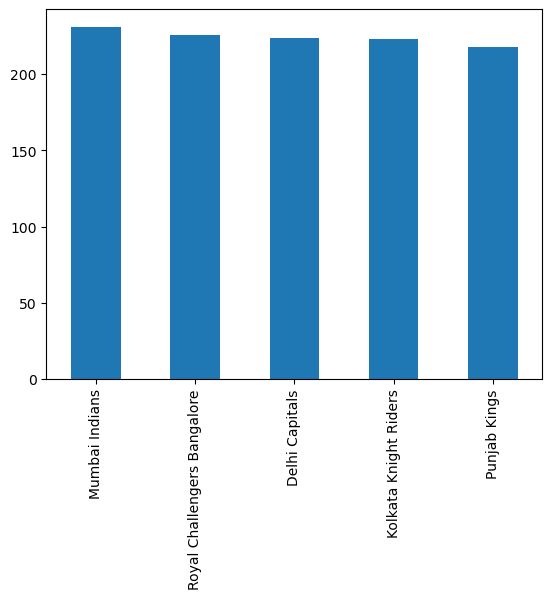

In [51]:
((ipl.Team1.value_counts() + ipl.Team2.value_counts()).sort_values(ascending=False).head(5)).plot(kind='bar')

### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [39]:
mask1 = ipl[(ipl.Team1 == 'Mumbai Indians') | (ipl.Team2 == 'Mumbai Indians')]
mask1.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit
15,1304105,Mumbai,2022-05-12,2022,59,Chennai Super Kings,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,DR Sams,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'RV Utha...","['Ishan Kishan', 'RG Sharma', 'DR Sams', 'Tila...",Chirra Ravikanthreddy,CB Gaffaney
18,1304102,Navi Mumbai,2022-05-09,2022,56,Kolkata Knight Riders,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",Mumbai Indians,field,N,Kolkata Knight Riders,Runs,52.0,NaN,JJ Bumrah,"['VR Iyer', 'AM Rahane', 'N Rana', 'SS Iyer', ...","['RG Sharma', 'Ishan Kishan', 'Tilak Varma', '...",CB Gaffaney,GR Sadashiv Iyer
23,1304097,Mumbai,2022-05-06,2022,51,Mumbai Indians,Gujarat Titans,"Brabourne Stadium, Mumbai",Gujarat Titans,field,N,Mumbai Indians,Runs,5.0,NaN,TH David,"['Ishan Kishan', 'RG Sharma', 'SA Yadav', 'Til...","['WP Saha', 'Shubman Gill', 'HH Pandya', 'B Sa...",J Madanagopal,GR Sadashiv Iyer


In [56]:
mask1[mask1.WinningTeam != 'Mumbai Indians']['Player_of_Match'].value_counts().head(1)

SPD Smith    4
Name: Player_of_Match, dtype: int64

### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [79]:
team1 = 'Kolkata Knight Riders'
team2 = 'Chennai Super Kings'
def team1_vs_team2(team1:str,team2:str):
    mask2 = ipl[((team1 == ipl.Team1) | (team1 == ipl.Team2)) & ((team2 == ipl.Team1) | (team2 == ipl.Team2))]
    print(mask2['WinningTeam'].value_counts())
    print(mask2['Player_of_Match'].value_counts().head(1))
team1_vs_team2(team1,team2)

Chennai Super Kings      17
Kolkata Knight Riders     9
Name: WinningTeam, dtype: int64
RA Jadeja    3
Name: Player_of_Match, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart. 

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: >

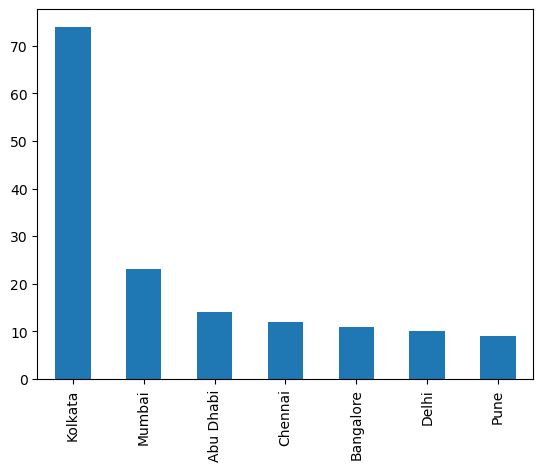

In [86]:
mask3 = ipl[(ipl.Team1 == 'Kolkata Knight Riders') | (ipl.Team2 == 'Kolkata Knight Riders')]
mask3['City'].value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [89]:
ipl.sample(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
452,829761,Kolkata,2015-05-07,2015,42,Kolkata Knight Riders,Delhi Capitals,Eden Gardens,Kolkata Knight Riders,bat,N,Kolkata Knight Riders,Runs,13.0,NaN,PP Chawla,"['RV Uthappa', 'G Gambhir', 'MK Pandey', 'PP C...","['MK Tiwary', 'SS Iyer', 'JP Duminy', 'KM Jadh...",AK Chaudhary,M Erasmus
786,419154,Jaipur,2010-04-14,2009/10,49,Rajasthan Royals,Royal Challengers Bangalore,Sawai Mansingh Stadium,Rajasthan Royals,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,KP Pietersen,"['MJ Lumb', 'NV Ojha', 'AG Paunikar', 'SR Wats...","['MK Pandey', 'JH Kallis', 'KP Pietersen', 'RV...",BR Doctrove,S Ravi
239,1175370,Mumbai,2019-04-03,2019,15,Mumbai Indians,Chennai Super Kings,Wankhede Stadium,Chennai Super Kings,field,N,Mumbai Indians,Runs,37.0,NaN,HH Pandya,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Yuvraj...","['SR Watson', 'AT Rayudu', 'SK Raina', 'KM Jad...",BNJ Oxenford,RJ Tucker
838,392236,Centurion,2009-05-21,2009,56,Royal Challengers Bangalore,Deccan Chargers,SuperSport Park,Royal Challengers Bangalore,bat,N,Royal Challengers Bangalore,Runs,12.0,NaN,MK Pandey,"['JH Kallis', 'MK Pandey', 'RE van der Merwe',...","['AC Gilchrist', 'HH Gibbs', 'TL Suman', 'A Sy...",IL Howell,S Ravi
615,598009,Pune,2013-04-11,2013,13,Pune Warriors,Rajasthan Royals,Subrata Roy Sahara Stadium,Rajasthan Royals,bat,N,Pune Warriors,Wickets,7.0,NaN,AJ Finch,"['RV Uthappa', 'AJ Finch', 'LRPL Taylor', 'Yuv...","['MDKJ Perera', 'AM Rahane', 'R Dravid', 'STR ...",M Erasmus,K Srinath


In [101]:
mask4 = ipl[((ipl.Team1 == 'Mumbai Indians') | (ipl.Team2 == 'Mumbai Indians')) & (ipl.Season == '2011')]
mask4['Margin'].mean()

19.25